In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
from numpy import round


In [103]:
files = os.listdir('./low_vol1/iter20')
files1 = os.listdir('./low_vol2/iter20')
data = pd.read_csv('./low_vol1/iter1/'+files[0], index_col=0)
for i in files[1:]:
    data1 = pd.read_csv('./low_vol1/iter20/'+i, index_col=0)
    data = pd.concat([data, data1], ignore_index=True)
for i in files1:
    data1 = pd.read_csv('./low_vol2/iter20/'+i, index_col=0)
    data = pd.concat([data, data1], ignore_index=True)

1000


In [4]:
def AdjCost(x):
    if "market" in x.lower():
        ret = -0.3
    else:
        ret = 0
    return ret

In [104]:
data['Adj_reward'] = data.order_type.apply(AdjCost)*data.remained_shares+data.reward
data

,BA_spead,last_traded_price,Smart_price,Liquidity_imb,market_cost,remained_shares,remained_time,reward,order_type,is_buy,premium,obj_price,base_price,executed,done,Adj_reward
0,0.01,0.175030,0.175029,0.042,0.001070,2.0,0.0,0.000000,Type.MARKET_BUY,True,0.01,175.030000,175.040000,0,True,-0.600000
1,0.01,0.175030,0.175034,-0.039,0.001545,3.0,5.0,10.400000,Type.LIMIT_SELL,False,0.05,175.080000,175.030000,2,False,10.400000
2,0.01,0.175020,0.175028,-0.031,0.000515,1.0,4.0,0.000000,Type.LIMIT_SELL,False,0.10,175.120000,175.020000,0,False,0.000000
3,0.01,0.175000,0.175004,-0.068,0.000515,1.0,3.0,0.000000,Type.LIMIT_SELL,False,0.06,175.060000,175.000000,0,False,0.000000
4,0.02,0.175003,0.174985,-0.038,0.000505,1.0,2.0,0.000000,Type.LIMIT_SELL,False,0.10,175.070000,174.970000,0,False,0.000000
5,0.01,0.174970,0.174978,-0.025,0.000515,1.0,1.0,0.000000,Type.LIMIT_SELL,False,0.04,175.010000,174.970000,0,False,0.000000
6,0.02,0.174950,0.174963,0.052,0.000505,1.0,0.0,0.000000,Type.MARKET_SELL,False,0.03,174.980000,174.950000,0,True,-0.300000
7,0.02,0.174950,0.174963,-0.052,0.001635,3.0,5.0,9.200000,Type.LIMIT_BUY,True,0.09,174.880000,174.970000,1,False,9.200000
8,0.01,0.174970,0.174963,-0.068,0.001070,2.0,4.0,0.000000,Type.LIMIT_BUY,True,0.07,174.900000,174.970000,0,False,0.000000
9,0.01,0.174970,0.174964,-0.062,0.001070,2.0,3.0,0.000000,Type.LIMIT_BUY,True,0.06,174.910000,174.970000,0,False,0.000000


In [68]:
agg_cost = []
obj_shares = []
tot_rwd = 0
obj_share = data.loc[0,'remained_shares']
for i in data.index:
    tot_rwd += data.loc[i, "Adj_reward"]
    if data.loc[i, "done"] == True:
        agg_cost.append(tot_rwd)
        obj_shares.append(obj_share)
        try:
            obj_share = data.loc[i+1, 'remained_shares']
        except IndexError:
            break
        tot_rwd = 0      

In [18]:
def clean(df):
    df = df.copy()
    for idx in df.index[1:]:
        if 'market' in df.loc[idx-1, "order_type"].lower() and df.loc[idx-1, "executed"] != df.loc[idx-1, "remained_shares"]:
            df.loc[idx-1, 'executed'] = df.loc[idx-1, "remained_shares"]
            df.loc[idx, 'executed'] -= df.loc[idx-1, "remained_shares"]
        df.loc[idx-1, "executed"] = max(0, df.loc[idx-1, "executed"])
        if 'market' in df.loc[idx-1, "order_type"].lower():
            df.loc[idx-1, 'reward'] = -0.003 * df.loc[idx-1, "executed"] * 100
        else:
            df.loc[idx-1, 'reward'] = (df.loc[idx-1, 'premium']+0.002) * df.loc[idx-1, "executed"] * 100

    if 'market' in df.loc[idx, "order_type"].lower():
        df.loc[idx, 'reward'] = -0.003 * df.loc[idx, "executed"] * 100
    else:
        df.loc[idx, 'reward'] = (df.loc[idx, 'premium']+0.002) * df.loc[idx, "executed"] * 100
    return df

In [69]:
data_new = pd.DataFrame({"obj_shares":obj_shares, "agg_cost":agg_cost})
data_new['market_cost'] = data_new.obj_shares*(-0.3)
data_new

,obj_shares,agg_cost,market_cost
0,2.0,-0.600000,-0.6
1,3.0,10.100000,-0.9
2,3.0,8.600000,-0.9
3,4.0,19.800000,-1.2
4,4.0,17.800001,-1.2
5,5.0,19.500000,-1.5
6,5.0,-1.500000,-1.5
7,6.0,50.700001,-1.8
8,6.0,13.200000,-1.8
9,1.0,17.800001,-0.3


In [78]:
exp_data_all = data_new.groupby(np.arange(len(data_new))//5).mean()
exp_data_all['cost_per_share'] = exp_data_all.agg_cost/exp_data_all.obj_shares
exp_data_all

,obj_shares,agg_cost,market_cost,cost_per_share
0,3.200000,11.140000,-0.96,3.481250
1,4.600000,19.940000,-1.38,4.334783
2,5.200000,15.100000,-1.56,2.903846
3,3.200000,14.160000,-0.96,4.425000
4,1.800000,15.360000,-0.54,8.533333
5,4.600000,18.400000,-1.38,4.000000
6,2.400000,13.180000,-0.72,5.491667
7,3.800000,9.560000,-1.14,2.515790
8,3.800000,10.220000,-1.14,2.689474
9,4.600000,1.920000,-1.38,0.417391


mean = exp_data_all.cost_per_share.mean()
std = exp_data_all.cost_per_share.std()
skew = exp_data_all.cost_per_share.skew()
num_bins = 11
n, bins, patches = plt.hist(exp_data_all.cost_per_share, num_bins, 
                            facecolor='blue', alpha=0.5, density=True,
                            edgecolor='k')
plt.text(plt.xlim()[1],sum(plt.ylim())/2,
         'Mean: \t\t{:.2f}'.format(mean)+'\nStd: \t{:.2f}'.format(std)+'\nSkewness: {:.2f}'.format(skew),
        fontsize=16)
plt.show()

/Users/abner/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/abner/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


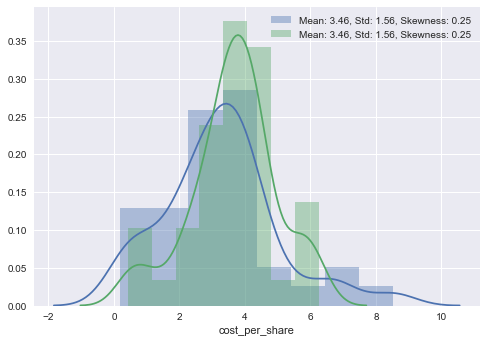

In [125]:
low_vol1 = exp_data_all.cost_per_share[:37]
low_vol2 = exp_data_all.cost_per_share[37:]

v1 = sns.distplot(low_vol1, label=f'Mean: {round(mean,2)}, Std: {round(std, 2)}, Skewness: {round(skew, 2)}')
v2 = sns.distplot(low_vol2, label=f'Mean: {round(mean,2)}, Std: {round(std, 2)}, Skewness: {round(skew, 2)}')
plt.legend()
plt.show()

# Comparison among different strategies

In [19]:
all_data = {}
for i in ['iter1', 'iter10', 'iter20']:
    files = os.listdir('./high_vol2/'+i)
    data = pd.read_csv('./high_vol2/'+i+'/'+files[0], index_col=0)
    for j in files[1:]:
        data1 = pd.read_csv('./high_vol2/'+i+'/'+j, index_col=0)
        data = pd.concat([data, data1], ignore_index=True)
    data = clean(data)
    data['Adj_reward'] = data.order_type.apply(AdjCost)*data.remained_shares+data.reward
    
    agg_cost = []
    obj_shares = []
    tot_rwd = 0
    obj_share = data.loc[0,'remained_shares']
    for m in data.index:
        tot_rwd += data.loc[m, "Adj_reward"]
        if data.loc[m, "done"] == True:
            agg_cost.append(tot_rwd)
            obj_shares.append(obj_share)
            try:
                obj_share = data.loc[m+1, 'remained_shares']
            except KeyError:
                break
            tot_rwd = 0  
    
    data_new = pd.DataFrame({"obj_shares":obj_shares, "agg_cost":agg_cost})
    data_new['market_cost'] = data_new.obj_shares*(-0.3)
    exp_data_all = data_new.groupby(np.arange(len(data_new))//5).mean()
    exp_data_all['cost_per_share'] = exp_data_all.agg_cost/exp_data_all.obj_shares
    
    all_data[i] = exp_data_all

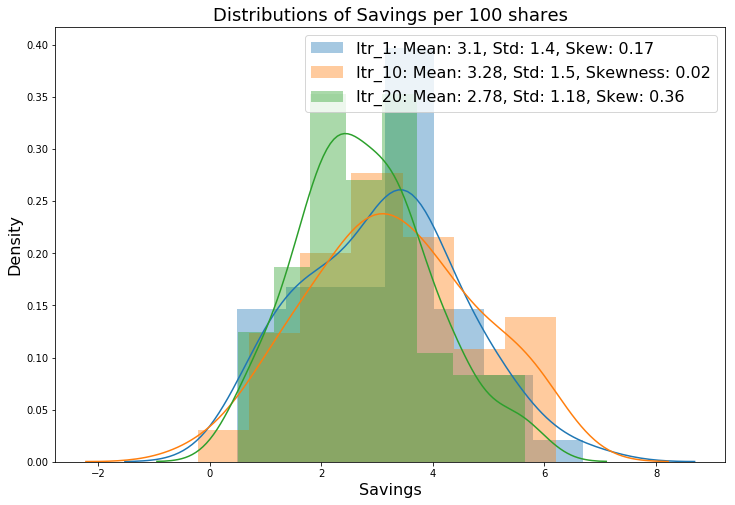

In [20]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
itr1 = all_data['iter1'].cost_per_share
itr10 = all_data['iter10'].cost_per_share
itr20 = all_data['iter20'].cost_per_share
# naive = all_data['naive'].cost_per_share

v1 = sns.distplot(itr1, label=f'Itr_1: Mean: {round(itr1.mean(),2)}, Std: {round(itr1.std(),2)}, Skew: {round(itr1.skew(),2)}')
v2 = sns.distplot(itr10, label=f'Itr_10: Mean: {round(itr10.mean(),2)}, Std: {round(itr10.std(), 2)}, Skewness: {round(itr10.skew(), 2)}')
v3 = sns.distplot(itr20, label=f'Itr_20: Mean: {round(itr20.mean(),2)}, Std: {round(itr20.std(),2)}, Skew: {round(itr20.skew(),2)}')
# v4 = sns.distplot(naive, label=f'Naive: Mean: {round(naive.mean(),2)}, Std: {round(naive.std(),2)}, Skew: {round(naive.skew(),2)}')
ax.legend(fontsize=16)
ax.set_xlabel('Savings', fontsize=16)
ax.set_ylabel('Density', fontsize=16)
ax.set_title('Distributions of Savings per 100 shares', fontsize=18)
plt.show()
fig.savefig('Figure_pre.png', dpi=300)

In [ ]:
f'Mean: {round(mean,2)}, Std: {round(std, 2)}, Skewness: {round(skew, 2)}'